# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [3]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Baixando os dados
data = pd.read_csv("insurance.csv")

Breve descrição das colunas:


**age**: idade do beneficiário primário

**sex**: gênero do contratante 

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

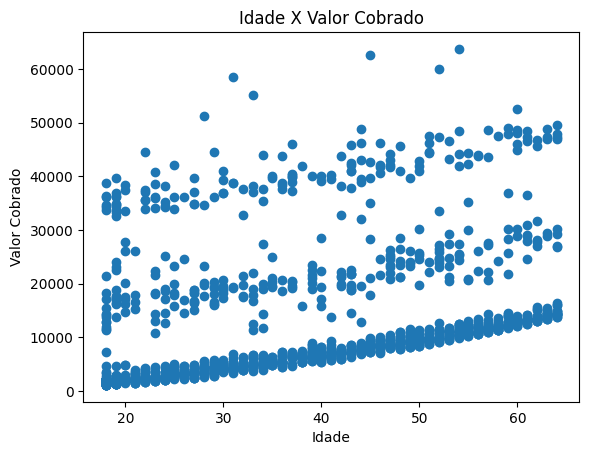

In [8]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.scatter(data["age"], data["charges"])
plt.title("Idade X Valor Cobrado")
plt.xlabel("Idade")
plt.ylabel("Valor Cobrado")
plt.show()

### 2) 

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

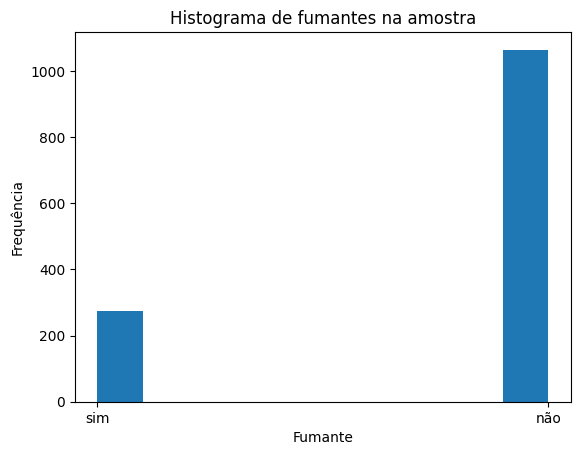

In [9]:
### SEU CÓDIGO COMEÇA AQUI ###
data = data.replace("yes","sim")
data = data.replace("no","não")
plt.hist(data["smoker"])
plt.xlabel("Fumante")
plt.ylabel("Frequência")
plt.title("Histograma de fumantes na amostra")
plt.show()

#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

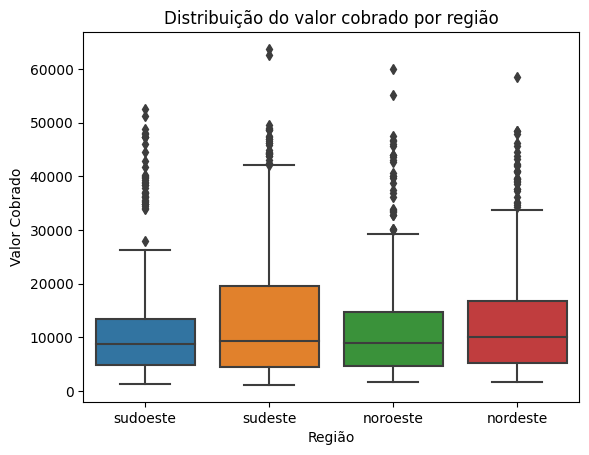

In [10]:
### SEU CÓDIGO COMEÇA AQUI ###
data = data.replace("northwest", "noroeste")
data = data.replace("southeast", "sudeste")
data = data.replace("southwest", "sudoeste")
data = data.replace("northeast", "nordeste")
sns.boxplot(x = data["region"], y = data["charges"])
plt.title("Distribuição do valor cobrado por região")
plt.xlabel("Região")
plt.ylabel("Valor Cobrado")
plt.show()

### 4) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

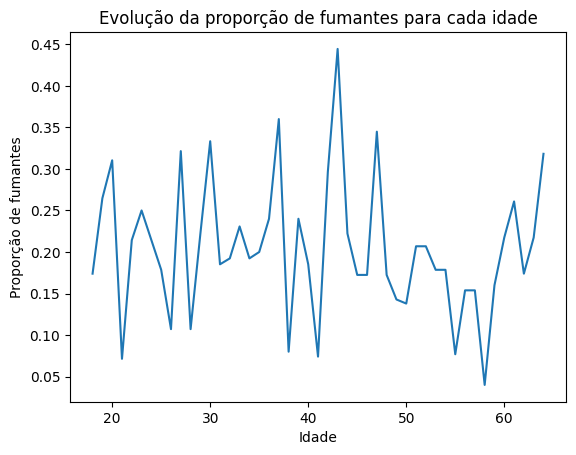

In [11]:
### SEU CÓDIGO COMEÇA AQUI ###
subgrupo = []
idade=[]
props = []

for n in data['age'].unique():
    idade.append(n)

idade.sort()

for i in idade:
    subgrupo = []
    for item in range(len(data['smoker'])):
        if data['age'][item] == i:
            subgrupo.append(data['smoker'][item])
    props.append(subgrupo.count('sim')/len(subgrupo))

plt.plot(idade, props)
plt.title("Evolução da proporção de fumantes para cada idade")
plt.xlabel("Idade")
plt.ylabel("Proporção de fumantes")
plt.show()

#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

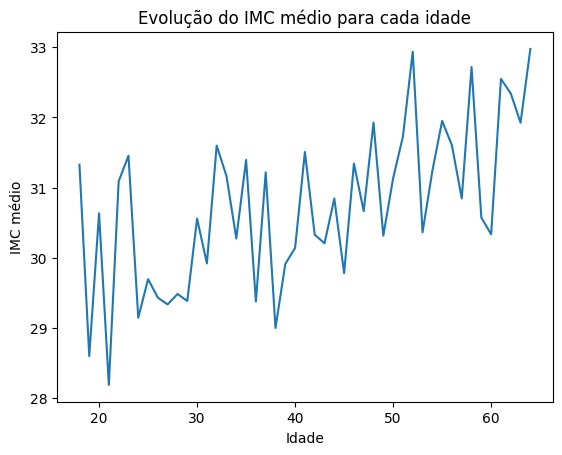

In [12]:
### SEU CÓDIGO COMEÇA AQUI ###
subgrupo = []
idade=[]
media = []

for n in data['age'].unique():
    idade.append(n)

idade.sort()

for i in idade:
    subgrupo = []
    for item in range(len(data['bmi'])):
        if data['age'][item] == i:
            subgrupo.append(data['bmi'][item])
    media.append(np.mean(subgrupo))

plt.plot(idade, media)
plt.title("Evolução do IMC médio para cada idade")
plt.xlabel("Idade")
plt.ylabel("IMC médio")
plt.show()

#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

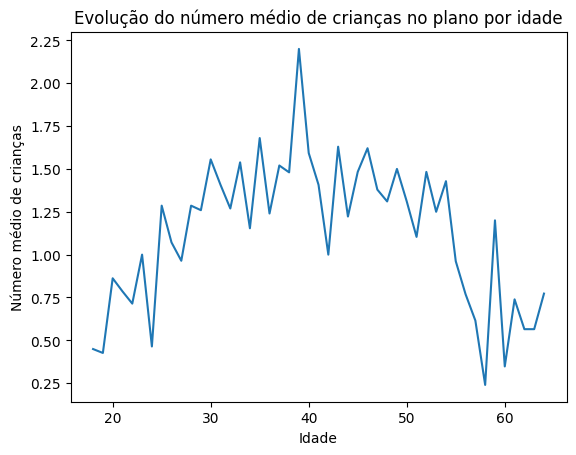

In [13]:
### SEU CÓDIGO COMEÇA AQUI ###
subgrupo = []
idade=[]
media = []

for n in data['age'].unique():
    idade.append(n)

idade.sort()

for i in idade:
    subgrupo = []
    for item in range(len(data['children'])):
        if data['age'][item] == i:
            subgrupo.append(data['children'][item])
    media.append(np.mean(subgrupo))

plt.plot(idade, media)
plt.title("Evolução do número médio de crianças no plano por idade")
plt.xlabel("Idade")
plt.ylabel("Número médio de crianças")
plt.show()

### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes 
dica: o nome da função na biblioteca é ```.box()```

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###